## Simple decay equations
The script is used to demonstrate how to solve the simple decay equation for selected scenarios

In [2]:
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

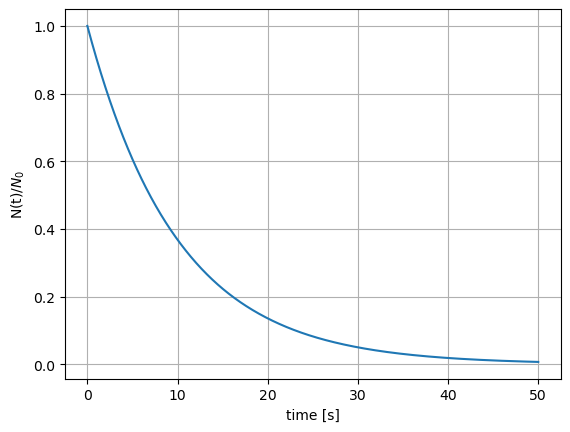

In [3]:
# Initial conditions
y0 = [1.0]

# Coupled ODEs
lambda_X = 0.1
t_start = 0.0
t_end = 5/lambda_X 
# Time span for integration 
t_span = (t_start, t_end)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

def dNdt(t, y):
    N_X = y
    dN_X = - lambda_X * N_X
    return dN_X

# Solve ODEs
sol = solve_ivp(dNdt, t_span, y0, t_eval=t_eval, method='RK45')

# Extract and convert time to hours
t_hr = sol.t
N_X = sol.y

plt.figure()
plt.plot(t_hr[:], N_X[0][:])
plt.xlabel('time [s]')
plt.ylabel('N(t)/$N_0$')
plt.grid()
plt.show()


## Two nuclide chains
The script is used to solve numerically a two-nuclide chain.

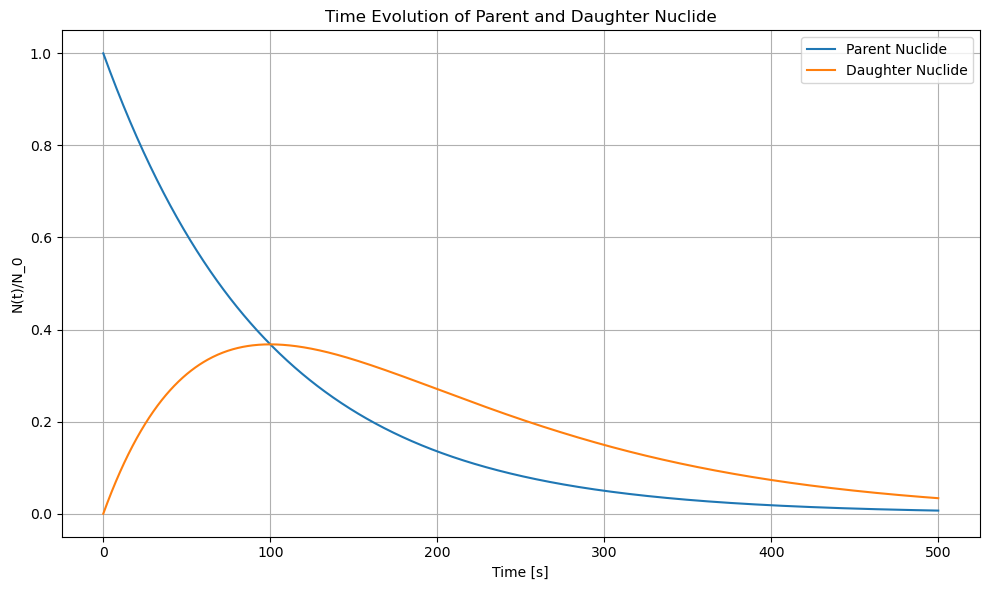

In [ ]:
# Initial conditions
y0 = [1.0, 0.0]

# Coupled ODEs
lambda_X = 0.01
lambda_Y = 0.01

t_start = 0.0
t_end = 5/lambda_X 
# Time span for integration 
t_span = (t_start, t_end)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

def dNdt(t, y):
    N_Y, N_X = y
    dN_Y = - lambda_Y * N_Y
    dN_X = lambda_Y * N_Y + - lambda_X * N_X
    return [dN_Y, dN_X]

# Solve ODEs
sol = solve_ivp(dNdt, t_span, y0, t_eval=t_eval, method='RK45')

# Extract and convert time to hours
t_hr = sol.t
N_Y = sol.y[0]
N_X = sol.y[1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_hr, N_Y, label='Parent Nuclide')
plt.plot(t_hr, N_X, label='Daughter Nuclide')
plt.xlabel('Time [s]')
plt.ylabel('$N(t)/N_0$')
plt.title('Time Evolution of Parent and Daughter Nuclide')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

